In [7]:
import torch
import torch.nn as nn
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [8]:
def load_img(img_path):
    img = Image.open(img_path)
    img = img.resize((200, 200))
    img = np.asarray(img, dtype=float)
    img = img/256
    img = np.moveaxis(img, -1, 0)
    return img

In [9]:
class Model2(nn.Module):
    def __init__(self):
        super().__init__()
        
        # 3 x 200 x 200
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3 )
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        # 32 x 99 x 99
        
        self.dense2 = nn.Linear(32 * 99 * 99, 128)
        self.relu2 = nn.ReLU()
        self.dense3 = nn.Linear(128, 1)
        # 1
        
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        
        x = torch.flatten(x, start_dim=1)
        x = self.dense2(x)
        x = self.relu2(x)
        x = self.dense3(x)
        x = torch.sigmoid(x)
        
        return x

In [10]:
net = Model2()
net.load_state_dict(torch.load("../../weights/vgg1-weights.pt"))

<All keys matched successfully>

In [11]:
def predict(img):
    img = np.array([img])
    img = torch.from_numpy(img)
    img = img.float()
    with torch.no_grad():
        y = net(img)
    if y.item() > 0.5:
        return("Dog")
    else:
        return("Cat")

'Dog'

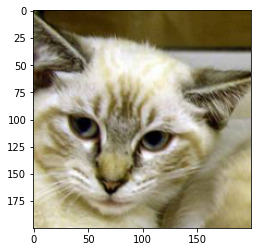

In [12]:
img = load_img("../../data/test1/1001.jpg")
plt.imshow(np.moveaxis(img, 0, 2))
predict(img)